In [ ]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', header=0, parse_dates=[0],  squeeze=True, date_parser=parser) #index_col=0,


In [ ]:
df.head()

,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


In [ ]:
df1=df['Sales']
df1.head()

0    266.0
1    145.9
2    183.1
3    119.3
4    180.3
Name: Sales, dtype: float64

Buscando uma análise da série temporal   MODELO AR

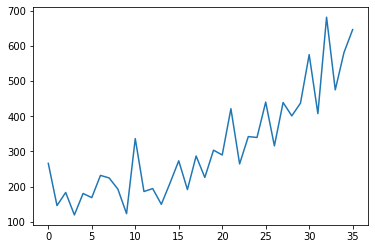

In [ ]:
df1.plot()

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 4.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
def AR_model_generation(ts, p):
    model = ARIMA(ts, order = [p, 0, 0])
    model_fit = model.fit()
    return model_fit

In [ ]:
AR_1 = AR_model_generation(df1, 1)
AR_2 =  AR_model_generation(df1, 2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
AR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -218.079
Date:                Wed, 26 Oct 2022   AIC                            442.157
Time:                        17:54:24   BIC                            446.908
Sample:                             0   HQIC                           443.815
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        333.2373     78.267      4.258      0.000     179.838     486.637
ar.L1          0.7509      0.128      5.872      0.000       0.500       1.002
sigma2      1.045e+04   2789.298      3.747      0.000    4985.064    1.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   7.54   Jarque-Bera (JB):                 2.51
Prob(Q):                              0.01   Prob(JB):                         0.28
Heteroskedasticity (H):               2.16   Skew:                             0.65
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

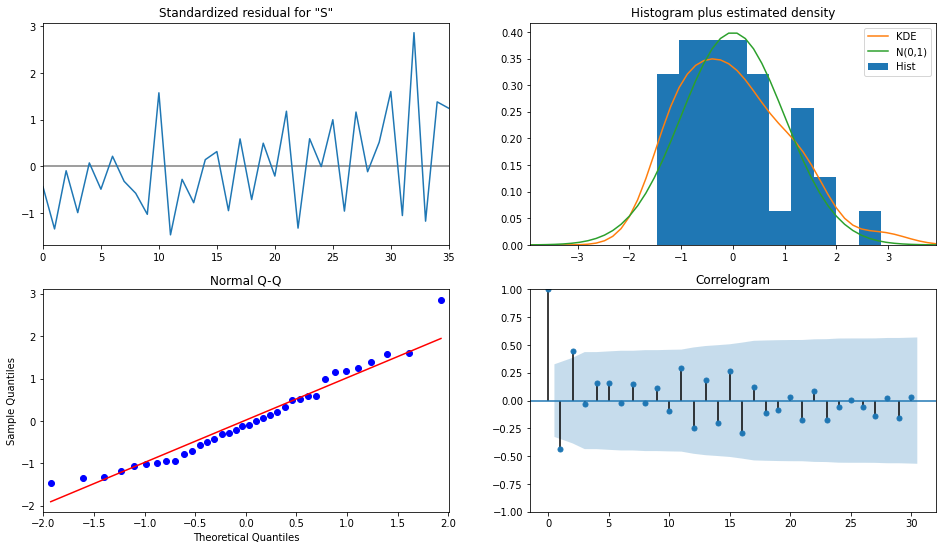

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = AR_1.plot_diagnostics(fig=fig, lags=30)

In [ ]:
AR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -207.732
Date:                Wed, 26 Oct 2022   AIC                            423.465
Time:                        17:54:25   BIC                            429.799
Sample:                             0   HQIC                           425.676
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        379.0560    202.004      1.876      0.061     -16.865     774.977
ar.L1          0.2617      0.134      1.953      0.051      -0.001       0.524
ar.L2          0.6858      0.146      4.683      0.000       0.399       0.973
sigma2      5622.9707   1605.243      3.503      0.000    2476.751    8769.190
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):                 1.98
Prob(Q):                              0.40   Prob(JB):                         0.37
Heteroskedasticity (H):               1.74   Skew:                             0.52
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

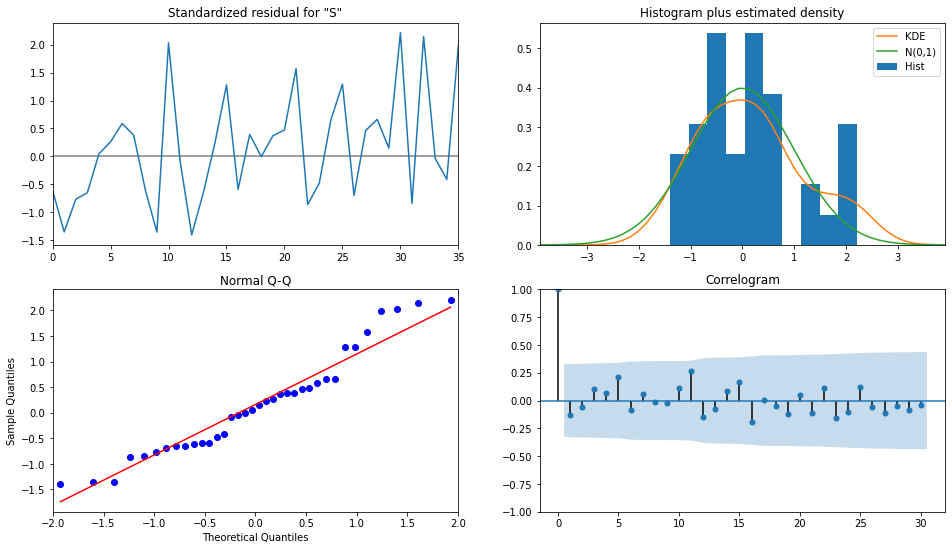

In [ ]:
fig_2 = plt.figure(figsize=(16,9))
fig_final = AR_2.plot_diagnostics(fig=fig_2, lags=30)

## Moving Average Model

In [ ]:
def MA_model_generation(ts, q):
    model = ARIMA(ts, order = [0, 0, q])
    model_fit = model.fit()
    return model_fit

In [ ]:
MA_1 = MA_model_generation(df1, 1)
MA_2 = MA_model_generation(df1, 2)

In [ ]:
MA_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -225.589
Date:                Wed, 26 Oct 2022   AIC                            457.179
Time:                        17:54:27   BIC                            461.929
Sample:                             0   HQIC                           458.837
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        313.3672     38.210      8.201      0.000     238.478     388.257
ma.L1          0.4004      0.162      2.468      0.014       0.082       0.718
sigma2      1.615e+04   4441.939      3.636      0.000    7444.771    2.49e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.17   Jarque-Bera (JB):                 5.65
Prob(Q):                              0.14   Prob(JB):                         0.06
Heteroskedasticity (H):               2.41   Skew:                             0.95
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
MA_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -218.353
Date:                Wed, 26 Oct 2022   AIC                            444.706
Time:                        17:54:27   BIC                            451.040
Sample:                             0   HQIC                           446.917
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        321.5869     44.939      7.156      0.000     233.509     409.665
ma.L1          0.5100      0.173      2.950      0.003       0.171       0.849
ma.L2          0.6086      0.160      3.811      0.000       0.296       0.922
sigma2      1.055e+04   3194.093      3.304      0.001    4293.134    1.68e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 3.96
Prob(Q):                              0.46   Prob(JB):                         0.14
Heteroskedasticity (H):               2.17   Skew:                             0.81
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

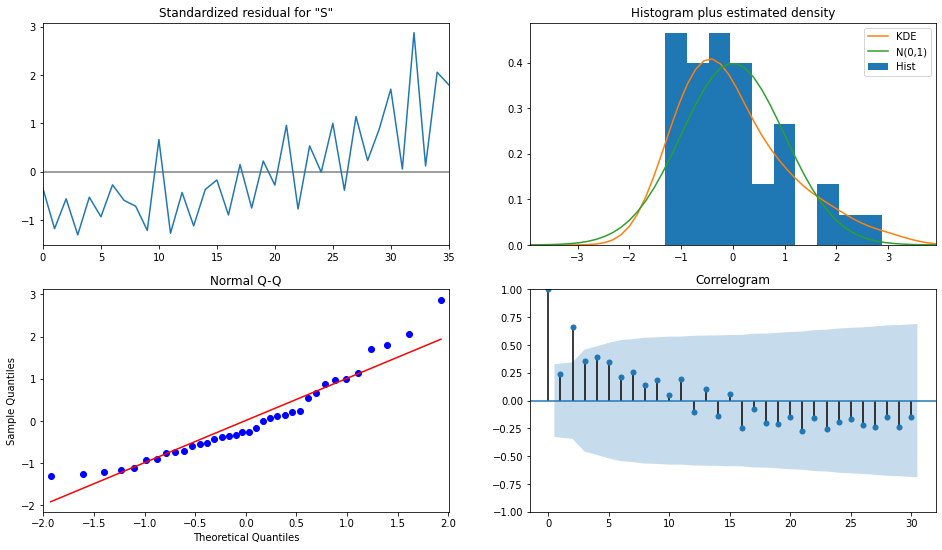

In [ ]:
fig_1 = plt.figure(figsize=(16,9))
fig_1 = MA_1.plot_diagnostics(fig=fig_1, lags=30)

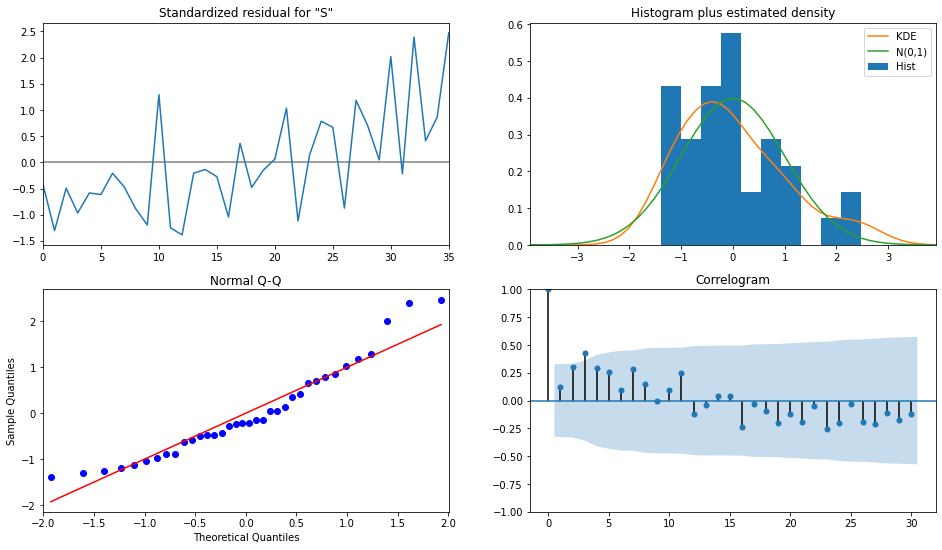

In [ ]:
fig_2 = plt.figure(figsize=(16,9))
fig_2 = MA_2.plot_diagnostics(fig=fig_2, lags=30)

# ARMA model

In [ ]:
def ARMA_model_generation(ts, p, q):
    model = ARIMA(ts, order = [p, 0, q])
    model_fit = model.fit()
    return model_fit

In [ ]:
ARMA_1_1 = ARMA_model_generation(df1, 1, 1)
ARMA_2_2 = ARMA_model_generation(df1, 2, 2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  maxiter=maxiter,


In [ ]:
ARMA_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -211.054
Date:                Wed, 26 Oct 2022   AIC                            430.108
Time:                        18:27:53   BIC                            436.442
Sample:                             0   HQIC                           432.319
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        372.7013    234.967      1.586      0.113     -87.826     833.228
ar.L1          0.9802      0.044     22.343      0.000       0.894       1.066
ma.L1         -0.5855      0.217     -2.695      0.007      -1.011      -0.160
sigma2      6857.3422   1720.647      3.985      0.000    3484.936    1.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   3.66   Jarque-Bera (JB):                 2.41
Prob(Q):                              0.06   Prob(JB):                         0.30
Heteroskedasticity (H):               2.11   Skew:                             0.63
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ARMA_2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -202.974
Date:                Wed, 26 Oct 2022   AIC                            417.948
Time:                        18:27:58   BIC                            427.450
Sample:                             0   HQIC                           421.265
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        313.7410    210.873      1.488      0.137     -99.562     727.044
ar.L1          1.0845      0.400      2.709      0.007       0.300       1.869
ar.L2         -0.1186      0.407     -0.291      0.771      -0.916       0.679
ma.L1         -1.3238     41.782     -0.032      0.975     -83.214      80.567
ma.L2          0.9995     63.040      0.016      0.987    -122.556     124.555
sigma2      3683.9432   2.32e+05      0.016      0.987    -4.5e+05    4.58e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.85   Prob(JB):                         0.97
Heteroskedasticity (H):               1.13   Skew:                             0.09
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

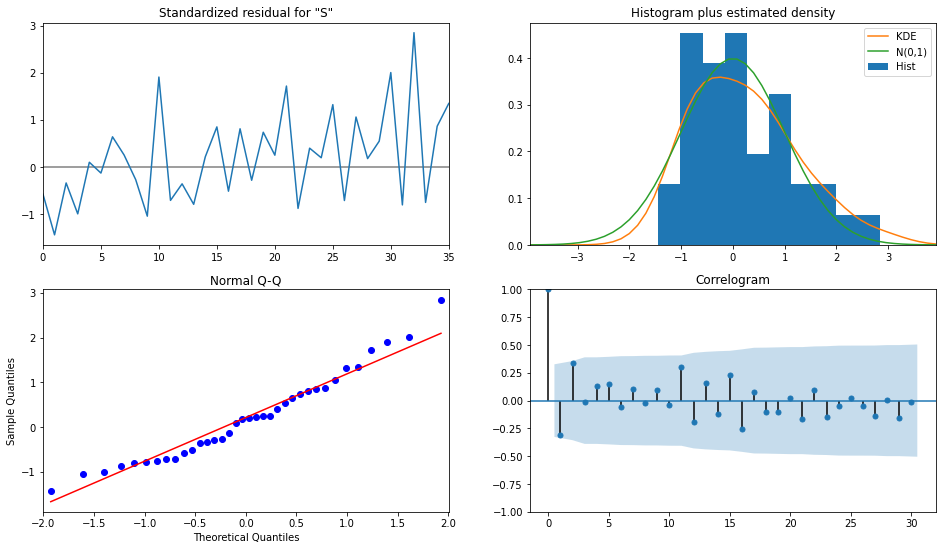

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = ARMA_1_1.plot_diagnostics(fig=fig, lags=30)

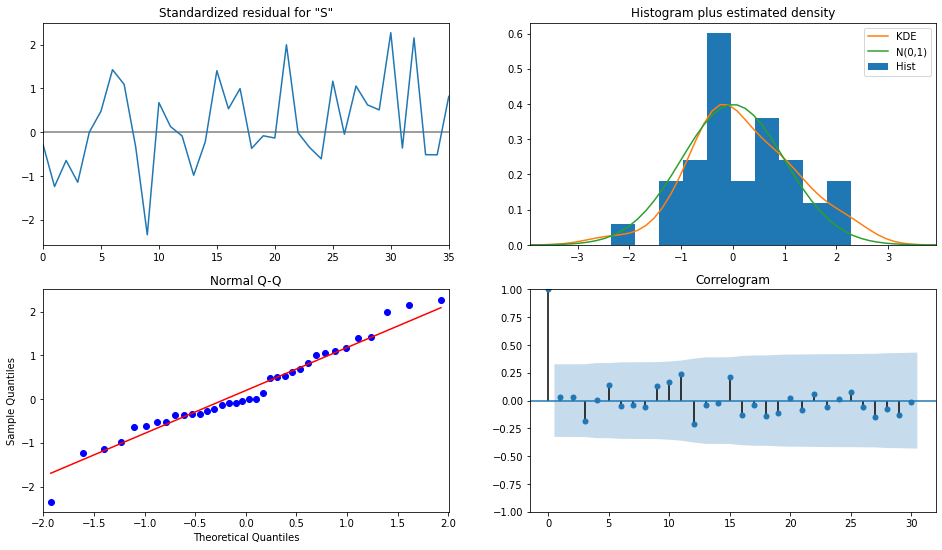

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = ARMA_2_2.plot_diagnostics(fig=fig, lags=30)

## Prophet: Forecasting at Scale

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
df.head()

,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


In [ ]:
data = df.rename(columns = {"Month": "ds", 'Sales': "y"})

DEBUG:cmdstanpy:input tempfile: /tmp/tmphci_5mz6/le9ttzt3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphci_5mz6/dwodomaj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26810', 'data', 'file=/tmp/tmphci_5mz6/le9ttzt3.json', 'init=/tmp/tmphci_5mz6/dwodomaj.json', 'output', 'file=/tmp/tmphci_5mz6/prophet_model1nzzydlt/prophet_model-20221026183105.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:31:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


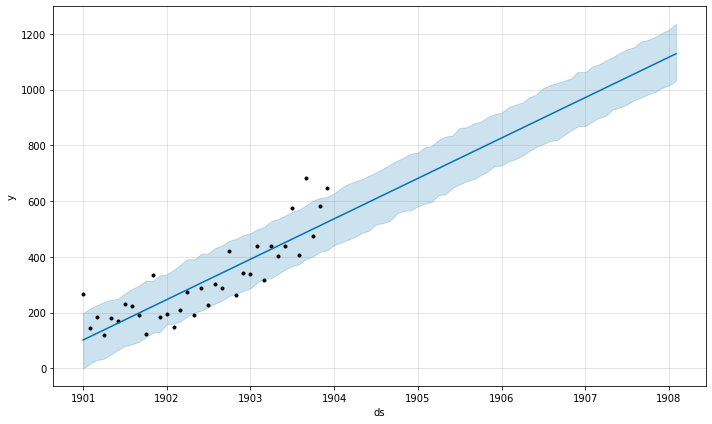

In [ ]:
model = Prophet(
    seasonality_mode="multiplicative",
    weekly_seasonality=False, 
    daily_seasonality=False,
    yearly_seasonality=False,
)
model.fit(data)

future = model.make_future_dataframe(periods=50, freq = "MS")

forecast = model.predict(future)
fig1 = model.plot(forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmphci_5mz6/sm_4ovf4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphci_5mz6/x0pdlkqs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68970', 'data', 'file=/tmp/tmphci_5mz6/sm_4ovf4.json', 'init=/tmp/tmphci_5mz6/x0pdlkqs.json', 'output', 'file=/tmp/tmphci_5mz6/prophet_modellktq9xpb/prophet_model-20221026183131.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:31:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


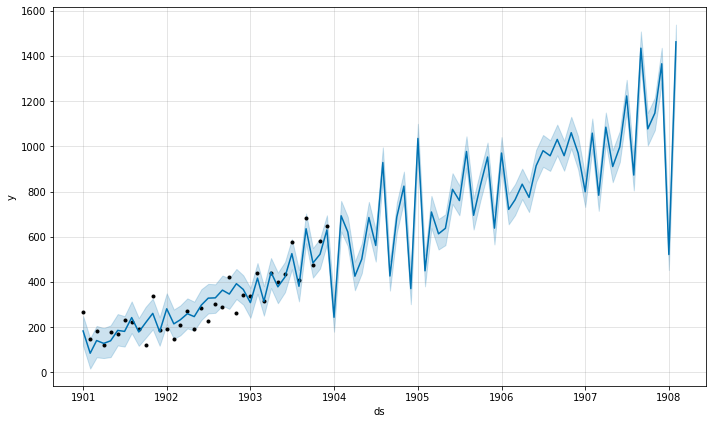

In [ ]:
model = Prophet(
    seasonality_mode="multiplicative",
    weekly_seasonality=False, 
    daily_seasonality=False,
    yearly_seasonality=True,
)
model.fit(data)

future = model.make_future_dataframe(periods=50, freq = "MS")

forecast = model.predict(future)
fig1 = model.plot(forecast)

In [ ]:
df=data

In [ ]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphci_5mz6/4qbp61yp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphci_5mz6/o8kq0a1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53145', 'data', 'file=/tmp/tmphci_5mz6/4qbp61yp.json', 'init=/tmp/tmphci_5mz6/o8kq0a1b.json', 'output', 'file=/tmp/tmphci_5mz6/prophet_modelmbbhlb6i/prophet_model-20221026183559.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:35:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:36:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=1000)

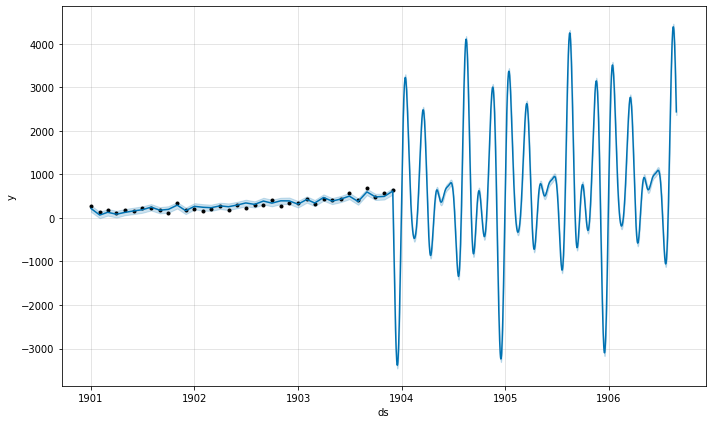

In [ ]:
forecast = model.predict(future)
fig1 = model.plot(forecast)

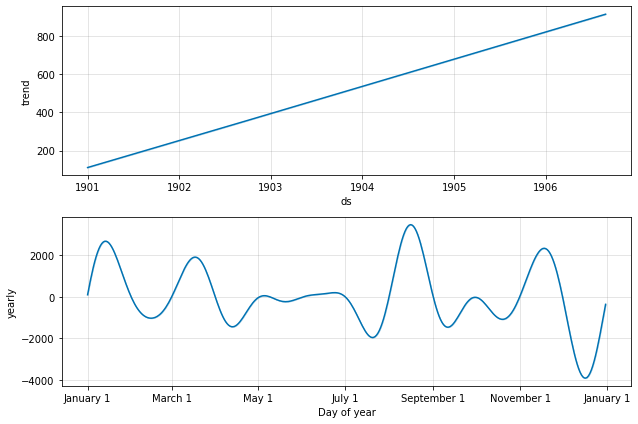

In [ ]:
fig2 = model.plot_components(forecast)

## crescimento exponencial

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphci_5mz6/2s50jyq3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphci_5mz6/ztncikzw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82125', 'data', 'file=/tmp/tmphci_5mz6/2s50jyq3.json', 'init=/tmp/tmphci_5mz6/ztncikzw.json', 'output', 'file=/tmp/tmphci_5mz6/prophet_modelwnn6h43o/prophet_model-20221026183744.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:37:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:37:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


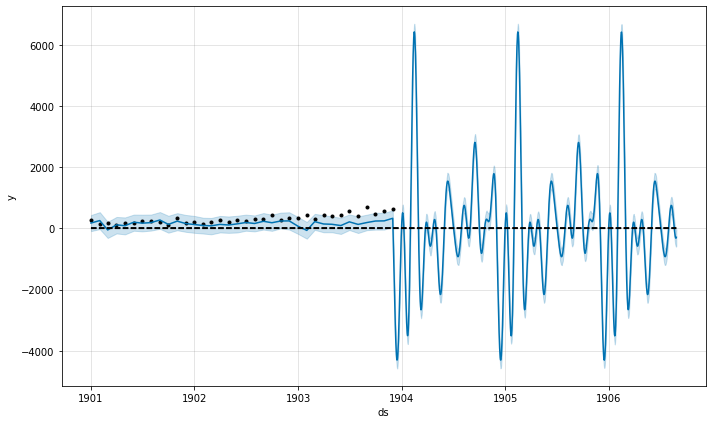

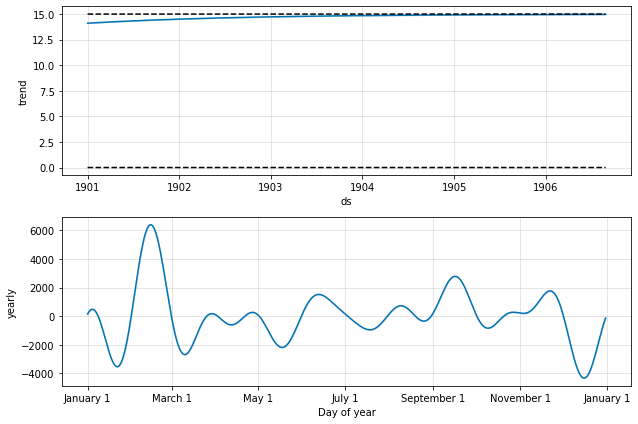

In [ ]:
model = Prophet(growth='logistic',changepoint_prior_scale = 0.1, seasonality_prior_scale = 1.0)
df['cap'] = 15
df['floor'] = 0

model.fit(df)
future = model.make_future_dataframe(periods=1000)
future['cap'] = 15
future['floor'] = 0
forecast = model.predict(future)
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)